In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_PM10 = pd.read_csv('Merged_PM10_Data.csv')
df_PM10

,stationID,datetime,pm10,o3,co,no2,so2,ws,wd,temp,rh,bp,rain,Traffic congestion index
0,02t,2023-12-01 00:00,NaN,NaN,NaN,NaN,NaN,0.7,49,30.0,53,754,0.0,2.4
1,02t,2023-12-01 01:00,NaN,NaN,NaN,NaN,NaN,0.8,51,29.5,55,753,0.0,2.1
2,02t,2023-12-01 02:00,NaN,NaN,NaN,NaN,NaN,0.4,5,29.1,57,753,0.0,2.5
3,02t,2023-12-01 03:00,NaN,NaN,NaN,NaN,NaN,0.4,30,28.5,60,753,0.0,2.3
4,02t,2023-12-01 04:00,NaN,NaN,NaN,NaN,NaN,0.7,19,28.1,62,753,0.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,54t,2024-01-02 20:00,67.0,NaN,2.32,NaN,NaN,0.2,307,30.3,58,760,0.0,2.9
9512,54t,2024-01-02 21:00,80.0,NaN,2.04,NaN,NaN,0.1,333,29.9,59,760,0.0,3.3
9513,54t,2024-01-02 22:00,91.0,NaN,1.66,NaN,NaN,0.1,358,29.6,59,760,0.0,2.5
9514,54t,2024-01-02 23:00,78.0,NaN,1.46,NaN,NaN,0.0,359,29.2,60,760,0.0,1.7


In [52]:
df_PM10.shape

(9516, 14)

In [53]:
df_PM10.describe()

,pm10,o3,co,no2,so2,ws,wd,temp,rh,bp,rain,Traffic congestion index
count,1584.000000,758.000000,716.000000,142.000000,357.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9384.000000
mean,65.729167,33.932718,1.127500,62.697183,196.791122,7.839460,64.859920,23.828457,32.982976,310.090164,0.024212,3.503325
std,34.091724,22.292032,0.511572,26.977529,106.964380,27.201396,98.059958,16.363443,30.117048,372.700555,0.934470,1.244620
min,8.000000,2.000000,0.040000,1.000000,0.297697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000
25%,38.000000,15.250000,0.790000,40.000000,108.096402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000
50%,62.000000,31.000000,1.030000,52.000000,206.032341,0.000000,0.000000,27.900000,43.000000,0.000000,0.000000,3.400000
75%,89.000000,48.750000,1.420000,97.000000,280.372515,0.400000,89.000000,31.300000,58.000000,757.000000,0.000000,4.500000
max,219.000000,128.000000,2.830000,97.000000,399.467267,172.100000,360.000000,62.900000,100.000000,769.000000,79.400000,7.000000


In [54]:
df_PM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   stationID                 9516 non-null   object 
 1   datetime                  9516 non-null   object 
 2   pm10                      1584 non-null   float64
 3   o3                        758 non-null    float64
 4   co                        716 non-null    float64
 5   no2                       142 non-null    float64
 6   so2                       357 non-null    float64
 7   ws                        9516 non-null   float64
 8   wd                        9516 non-null   int64  
 9   temp                      9516 non-null   float64
 10  rh                        9516 non-null   int64  
 11  bp                        9516 non-null   int64  
 12  rain                      9516 non-null   float64
 13  Traffic congestion index  9384 non-null   float64
dtypes: float

### **Heatmap**

<ipython-input-55-788a289dee79>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_PM10.corr(), annot=True, cmap='coolwarm', fmt=".2f")


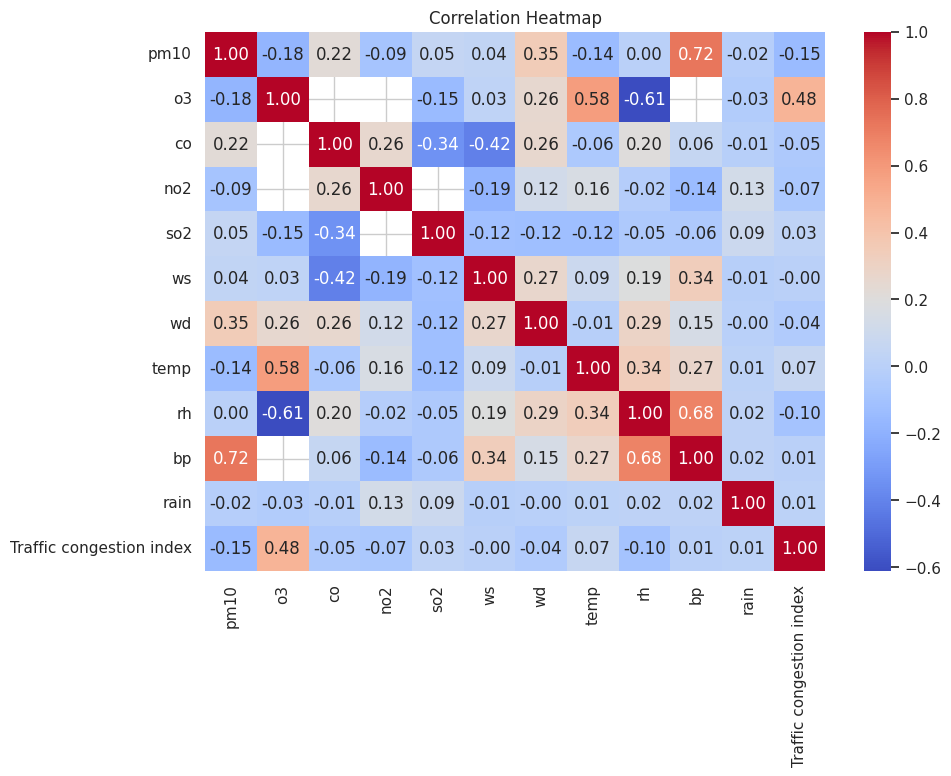

In [55]:
# สร้าง heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_PM10.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Min Max Pm10**

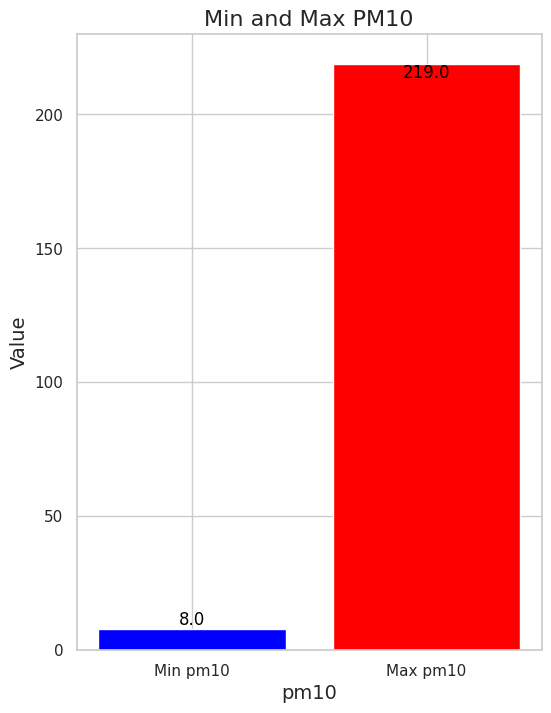

In [56]:
max_pm10 = df_PM10['pm10'].max()
min_pm10 = df_PM10['pm10'].min()

plt.figure(figsize=(6, 8))  # ปรับขนาดกราฟเป็นแนวตั้ง

bar_values = [min_pm10, max_pm10]
bar_labels = ['Min pm10', 'Max pm10']
bar_colors = ['blue', 'red']

bars = plt.bar(bar_labels, bar_values, color=bar_colors)  # ใช้ plt.bar() แทน plt.barh()

for bar, value in zip(bars, bar_values):
    plt.text(bar.get_x() + bar.get_width()/2, value, f'{value}', ha='center', va='bottom' if value == min_pm10 else 'top',
             color='black', fontsize=12)

plt.ylabel('Value', fontsize=14)  # เปลี่ยนแกนของแนวตั้งเป็น 'Value'
plt.xlabel('pm10', fontsize=14)  # เปลี่ยนแกนของแนวนอนเป็น 'pm10'
plt.title('Min and Max PM10', fontsize=16)

plt.show()

### **Drop Columns**

In [57]:
df_PM10 = df_PM10.drop(columns=['ws','wd', 'temp', 'rh', 'bp','rain'])
df_PM10

,stationID,datetime,pm10,o3,co,no2,so2,Traffic congestion index
0,02t,2023-12-01 00:00,NaN,NaN,NaN,NaN,NaN,2.4
1,02t,2023-12-01 01:00,NaN,NaN,NaN,NaN,NaN,2.1
2,02t,2023-12-01 02:00,NaN,NaN,NaN,NaN,NaN,2.5
3,02t,2023-12-01 03:00,NaN,NaN,NaN,NaN,NaN,2.3
4,02t,2023-12-01 04:00,NaN,NaN,NaN,NaN,NaN,1.8
...,...,...,...,...,...,...,...,...
9511,54t,2024-01-02 20:00,67.0,NaN,2.32,NaN,NaN,2.9
9512,54t,2024-01-02 21:00,80.0,NaN,2.04,NaN,NaN,3.3
9513,54t,2024-01-02 22:00,91.0,NaN,1.66,NaN,NaN,2.5
9514,54t,2024-01-02 23:00,78.0,NaN,1.46,NaN,NaN,1.7


### **duplicated**

In [58]:
df_PM10.drop_duplicates(keep=False, inplace=True)
print('duplicated: %s'%(df_PM10.duplicated(keep=False).sum()))

duplicated: 0


In [59]:
df_PM10

,stationID,datetime,pm10,o3,co,no2,so2,Traffic congestion index
0,02t,2023-12-01 00:00,NaN,NaN,NaN,NaN,NaN,2.4
1,02t,2023-12-01 01:00,NaN,NaN,NaN,NaN,NaN,2.1
2,02t,2023-12-01 02:00,NaN,NaN,NaN,NaN,NaN,2.5
3,02t,2023-12-01 03:00,NaN,NaN,NaN,NaN,NaN,2.3
4,02t,2023-12-01 04:00,NaN,NaN,NaN,NaN,NaN,1.8
...,...,...,...,...,...,...,...,...
9511,54t,2024-01-02 20:00,67.0,NaN,2.32,NaN,NaN,2.9
9512,54t,2024-01-02 21:00,80.0,NaN,2.04,NaN,NaN,3.3
9513,54t,2024-01-02 22:00,91.0,NaN,1.66,NaN,NaN,2.5
9514,54t,2024-01-02 23:00,78.0,NaN,1.46,NaN,NaN,1.7


### **Missing Value**

In [60]:
df_PM10.isnull().any()

stationID                   False
datetime                    False
pm10                         True
o3                           True
co                           True
no2                          True
so2                          True
Traffic congestion index     True
dtype: bool

In [61]:
columns_to_drop = ['stationID', 'datetime']
means = df_PM10.drop(columns=columns_to_drop).mean()
df_PM10.fillna(value=means, inplace=True)
means

pm10                         65.729167
o3                           33.932718
co                            1.127500
no2                          62.697183
so2                         196.791122
Traffic congestion index      3.503325
dtype: float64

In [62]:
df_PM10.isnull().any()

stationID                   False
datetime                    False
pm10                        False
o3                          False
co                          False
no2                         False
so2                         False
Traffic congestion index    False
dtype: bool

In [63]:
df_PM10

,stationID,datetime,pm10,o3,co,no2,so2,Traffic congestion index
0,02t,2023-12-01 00:00,65.729167,33.932718,1.1275,62.697183,196.791122,2.4
1,02t,2023-12-01 01:00,65.729167,33.932718,1.1275,62.697183,196.791122,2.1
2,02t,2023-12-01 02:00,65.729167,33.932718,1.1275,62.697183,196.791122,2.5
3,02t,2023-12-01 03:00,65.729167,33.932718,1.1275,62.697183,196.791122,2.3
4,02t,2023-12-01 04:00,65.729167,33.932718,1.1275,62.697183,196.791122,1.8
...,...,...,...,...,...,...,...,...
9511,54t,2024-01-02 20:00,67.000000,33.932718,2.3200,62.697183,196.791122,2.9
9512,54t,2024-01-02 21:00,80.000000,33.932718,2.0400,62.697183,196.791122,3.3
9513,54t,2024-01-02 22:00,91.000000,33.932718,1.6600,62.697183,196.791122,2.5
9514,54t,2024-01-02 23:00,78.000000,33.932718,1.4600,62.697183,196.791122,1.7


### **Outlier**

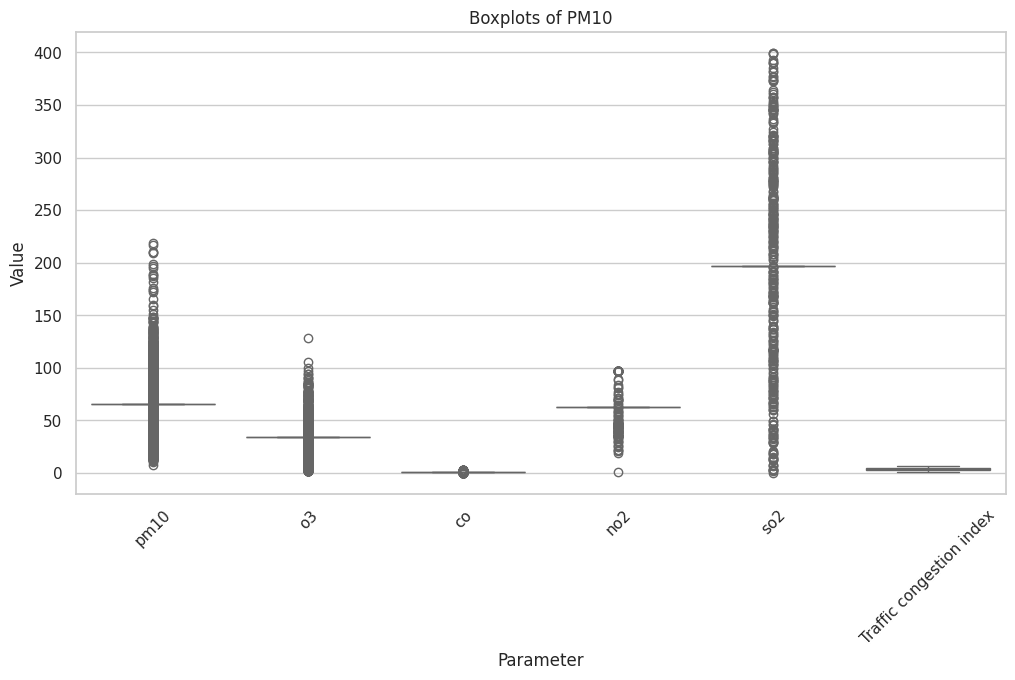

In [64]:
sns.set(style="whitegrid")

# Define the columns you want to create boxplots for
columns_to_plot = ['pm10', 'o3', 'co', 'no2', 'so2','Traffic congestion index']

# Create boxplots using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_PM10[columns_to_plot], orient="v", palette="Set3")
plt.title('Boxplots of PM10')
plt.ylabel('Value')
plt.xlabel('Parameter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [65]:
df_PM10.to_csv('PM10_data_with_prep.csv', index=False)